In [1]:
from sklearn.datasets import fetch_mldata

In [40]:
mnist=fetch_mldata('MNIST original')

mnist.data.shape

In [5]:
mnist.data.shape

(70000, 784)

In [7]:
mnist.keys()

['data', 'COL_NAMES', 'DESCR', 'target']

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [10]:
X,y = mnist.data, mnist.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
#test_size is 25% of the data 

In [14]:
#Fitting a Random Forest classifier with 200 trees to the MNIST data 
#show the accuracy 
rf_200 = RandomForestClassifier(n_estimators=200)
rfc_model_200 = rf_200.fit(X_train, y_train)
rf_200.score(X_test,y_test)

0.96885714285714286

In [13]:
#With 100 trees 
rf_100 = RandomForestClassifier(n_estimators=100)
rf_100.fit(X_train, y_train)
rf_100.score(X_test, y_test)

0.96760000000000002

In [15]:
#the feature importance vector for the random forest classifier 
rfc_model_200.feature_importances_

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.08209444e-07,
         8.12837994e-07,   1.34080941e-06,   3.93755795e-06,
         2.51399532e-06,   6.47928500e-06,   9.06078068e-07,
         2.70493465e-06,   4.89518965e-06,   3.66077407e-06,
         2.60577769e-06,   2.15888084e-06,   9.20800003e-07,
         9.78757456e-07,

In [16]:
rfc_model_200.feature_importances_.shape

(784,)

In [17]:
array_feat_importance = rfc_model_200.feature_importances_.reshape(28,28)

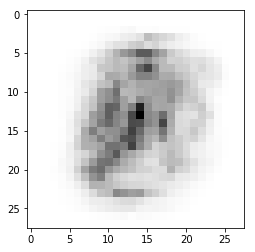

In [18]:
plt.imshow(array_feat_importance, cmap=plt.cm.binary)

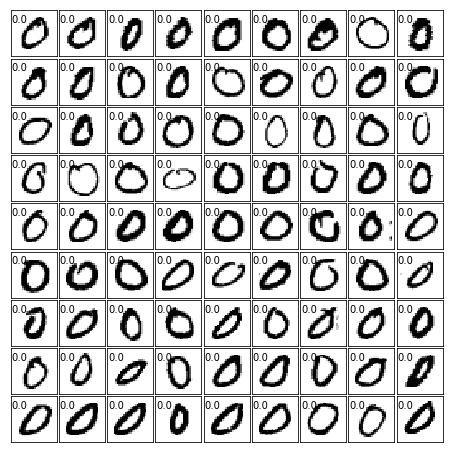

In [21]:
#here are the first 81 digits
fig = plt.figure(figsize=(6, 6))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(mnist.data[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(mnist.target[i]))

In [25]:
#wait, this might be ordered, so let's check...
check_vector = mnist.target[8000:10500]

In [26]:
len(check_vector)

2500

In [27]:
print(check_vector.reshape(50,50))

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


In [28]:
#we should have shuffled in the train_test_split method
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=42)

In [30]:
#check that this is "randomly" split
check_vector_2 = train_y[2500:5000]
print(check_vector_2.reshape(50,50))

[[ 5.  8.  8. ...,  6.  3.  9.]
 [ 0.  1.  9. ...,  0.  4.  5.]
 [ 0.  1.  2. ...,  3.  0.  9.]
 ..., 
 [ 8.  8.  3. ...,  5.  0.  8.]
 [ 4.  4.  1. ...,  7.  6.  0.]
 [ 6.  6.  1. ...,  4.  3.  6.]]


In [31]:
#fitting the RandomForestClassifier with 200 trees to the training data 
#show the accuracy 
rf_200 = RandomForestClassifier(n_estimators=200)
rfc_model_200 = rf_200.fit(X_train, y_train)
rf_200.score(X_test,y_test)

0.96845714285714291

In [32]:
array_feat_importance = rfc_model_200.feature_importances_.reshape(28,28)

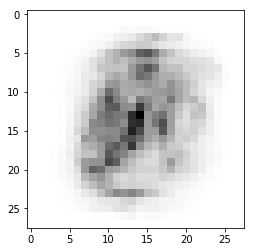

In [33]:
plt.imshow(array_feat_importance, cmap=plt.cm.binary)
#visualizing feature importance with the shuffled data 

In [34]:
#What if we stratify y? 
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=88, stratify=y)

In [35]:
rf_200 = RandomForestClassifier(n_estimators=200)
rfc_model_200 = rf_200.fit(X_train, y_train)
rf_200.score(X_test,y_test)

#but this is exactly the same accurancy as before?! 

0.96845714285714291

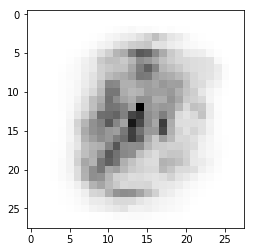

In [36]:
array_feat_importance = rfc_model_200.feature_importances_.reshape(28,28)
plt.imshow(array_feat_importance, cmap=plt.cm.binary)

In [41]:
#But how could I do this with Logistic regression? Probably not a good idea
#There are 784 features, each corresponding to a pixel 
#But I would need to make each 0 or 1... instead of the continuous value it already takes on
from sklearn.linear_model import LogisticRegression 
binary_mnist = mnist.data.copy()
for i in range(70000):
    for j in range(784):
        if binary_mnist[i,j] > .2: #Just randomly chose a cutoff... 
            binary_mnist[i,j] = 1
        else: 
            binary_mnist[i,j]=0   

In [43]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(binary_mnist,y,random_state=11)

In [44]:
lr=LogisticRegression().fit(X_train_2,y_train_2)

In [45]:
#And the accuracy of the model is much lower than that of the RandomForestClassifier
lr.score(X_test_2, y_test_2)

0.9095428571428571

In [47]:
#Finding the best parameters for the RandomForestClassifier 
from sklearn.model_selection import GridSearchCV 

In [49]:
parameters = {'n_estimators':[100,150,200],'max_features':['sqrt', 'log2', 10],
              'max_depth':[5, 7, 9]}
grid = GridSearchCV(RandomForestClassifier(),parameters, n_jobs=-1)

In [51]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'max_features': ['sqrt', 'log2', 10], 'max_depth': [5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [52]:
grid.score(X_test, y_test) #why is this lower than just the 200 trees randomforestclassifier (and no other specifications)

0.93594285714285719

In [53]:
grid.best_params_

{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200}